# Training a Support Vector Machine on the Credit Dataset by Kamalnath Devarajan

Train an SVM with linear and rbf kernels on the credit dataset, as well as one other kernel of your choice. Optimize the hyper-parameters and settings to try to achieve the best accuracy on the validation set and report your results. Then run your model on the test dataset. Report the accuracy. Graph and attach the classifications on the test set.

First, we import the necessary packages.

In [149]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, PredefinedSplit
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

The credit dataset is stored in a text file named "SVM_credit_data.txt". Each row in the dataset corresponds to a sample, and each sample has 24 attributes/features. The last column in the dataset corresponds to the ground truth label of each sample.

In total, there are 800 samples, with each sample having 24 attributes.

In [150]:
# Loading the credit dataset
credit_data = pd.read_csv("SVM_credit_data.txt", delim_whitespace = True, header = None)
#print(credit_data)

# Separating each sample's data and their ground truth labels and storing them in variables
credit_target = credit_data[24].to_numpy()
credit_data1 = credit_data.loc[:, 0:23].to_numpy()
print(credit_data1)

[[ 1  6  4 ...  0  0  1]
 [ 2 48  2 ...  0  0  1]
 [ 4 12  4 ...  0  1  0]
 ...
 [ 4 12  4 ...  0  1  0]
 [ 4 24  3 ...  0  0  1]
 [ 2  9  2 ...  1  0  0]]


We need to split our data, according to the following proportions: 
- 70% - training set
- 10% - validation set
- 20% - test set

In [151]:
X_train, X_test, y_train, y_test = train_test_split(credit_data1,
                                                    credit_target,
                                                    test_size=0.2,
                                                    random_state = 42,
                                                    shuffle=True,
                                                    stratify = credit_target)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.125,
                                                  random_state = 42,
                                                  stratify=y_train) # 0.125 x 0.8 = 0.1

Now that we've split our dataset into the required proportions, we can now fit our model to the training set, optimize hyperparameters on the validation set and then finally make predictions on the test set.

I first decided to fit the SVM model to the training set using three different kernel functions, **linear, radial basis function (rbf)** and **sigmoid** with their default hyperparameter settings (C=1, gamma = 'scale') and then evaluated their performance on the training, validation and test sets. I didn't do any sort of hyperparameter tuning here.

My goal is to compare the training, validation and test accuracies obtained before and after hyperparameter tuning and show that there is an improvement in accuracy after tuning the hyperparameters.

#### SVM - Linear Kernel without hyperparameter tuning

In [152]:
svc_linear1 = SVC(kernel = 'linear', C = 1)
svc_linear1.fit(X_train, y_train)
#print(svc_linear.predict(X_test))
#print(classification_report(y_val, svc_linear.predict(X_val)))
print("Training set accuracy for linear kernel = ", accuracy_score(y_train, svc_linear1.predict(X_train)))
print("Validation set accuracy for linear kernel = ", accuracy_score(y_val, svc_linear1.predict(X_val)))
print("Test set accuracy for linear kernel = ", accuracy_score(y_test, svc_linear1.predict(X_test)))

Training set accuracy for linear kernel =  0.7892857142857143
Validation set accuracy for linear kernel =  0.75
Test set accuracy for linear kernel =  0.75625


#### SVM - rbf Kernel without hyperparameter tuning

In [153]:
svc_rbf1 = SVC(kernel = 'rbf', C = 1, gamma = 'scale')
svc_rbf1.fit(X_train, y_train)
#print(svc_rbf.predict(X_test))
#print(classification_report(y_val, svc_rbf.predict(X_val))) 
print("Training set accuracy for rbf kernel = ", accuracy_score(y_train, svc_rbf1.predict(X_train)))
print("Validation set accuracy for rbf kernel = ", accuracy_score(y_val, svc_rbf1.predict(X_val)))
print("Test set accuracy for rbf kernel = ", accuracy_score(y_test, svc_rbf1.predict(X_test)))

Training set accuracy for rbf kernel =  0.7125
Validation set accuracy for rbf kernel =  0.7125
Test set accuracy for rbf kernel =  0.70625


#### SVM - Sigmoid Kernel without hyperparameter tuning

In [154]:
svc_sig1 = SVC(kernel = 'sigmoid', C = 1, gamma = 'scale')
svc_sig1.fit(X_train, y_train)
#print(svc_sig.predict(X_test))
#print(classification_report(y_val, svc_sig.predict(X_val)))
print("Training set accuracy for sigmoid kernel = ", accuracy_score(y_train, svc_sig1.predict(X_train)))
print("Validation set accuracy for sigmoid kernel = ", accuracy_score(y_val, svc_sig1.predict(X_val)))
print("Test set accuracy for sigmoid kernel = ", accuracy_score(y_test, svc_sig1.predict(X_test)))

Training set accuracy for sigmoid kernel =  0.6678571428571428
Validation set accuracy for sigmoid kernel =  0.55
Test set accuracy for sigmoid kernel =  0.64375


Let's now tune our hyperparameters to obtain some improvement in the accuracy of our train, validation and test sets. We first use the GridSearchCV() function to look for optimal parameters for each kernel. We then fit our model again to the training set with these newly obtained parameters for each kernel and predict and evaluate the performance on the test set, to see if there is an improvement in performance after hyperparameter tuning.

#### Grid Search for hyperparameters for Linear Kernel

In [155]:
#Grid Search for Linear kernel

param_grid = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}]
              
my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(X_train)):
    my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in validation set
for i in range(len(X_val)):
    my_test_fold.append(0)

pds = PredefinedSplit(test_fold = my_test_fold)

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=pds) 

# fitting the model for grid search 
grid.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.775, total=   0.0s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.750, total=   0.3s
[CV] C=10, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ................. C=10, kernel=linear, score=0.775, total=   2.4s
[CV] C=100, kernel=linear ............................................
[CV] ................ C=100, kernel=linear, score=0.775, total=  32.0s
{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, kernel='linear')


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.6s finished


We have successfully found the optimal hyperparameters for the linear kernel. Let's know fit the model on the training set using these parameters and evaluate the performance on the train, test and validation sets.

#### SVM - Linear Kernel after hyperparameter tuning

In [156]:
svc_linear = grid.best_estimator_

svc_linear.fit(X_train, y_train)
#svc_linear.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

print("Training set accuracy for linear kernel = ", accuracy_score(y_train, svc_linear.predict(X_train)))

SVM_predictions_val_lin = svc_linear.predict(X_val)
print("Validation set accuracy for linear kernel after hyperparameter tuning =", accuracy_score(y_val, SVM_predictions_val_lin))

SVM_predictions_test_lin = svc_linear.predict(X_test) 
print("Test set accuracy for linear kernel after hyperparameter tuning =", accuracy_score(y_test, SVM_predictions_test_lin))

Training set accuracy for linear kernel =  0.7821428571428571
Validation set accuracy for linear kernel after hyperparameter tuning = 0.775
Test set accuracy for linear kernel after hyperparameter tuning = 0.75


We follow the same procedure as above for the other two kernels

#### Grid Search for hyperparameters for rbf Kernel

In [157]:
#Grid Search for rbf kernel

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']}

my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(X_train)):
    my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in validation set
for i in range(len(X_val)):
    my_test_fold.append(0)

pds = PredefinedSplit(test_fold = my_test_fold)

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=pds) 

# fitting the model for grid search 
grid.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 1 folds for each of 54 candidates, totalling 54 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] ..... C=0.0001, gamma=0.1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=1e-05, kernel=rbf ...............................
[CV] ... C=0.0001, gamma=1e-05, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV] .... C=0.01, gamma=0.0001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.01, gamma=1e-05, kernel=rbf .................................
[CV] ..... C=0.01, gamma=1e-05, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished


#### SVM - rbf Kernel after hyperparameter tuning

In [158]:
svc_rbf = grid.best_estimator_
svc_rbf.fit(X_train, y_train)
#svc_linear.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

print("Training set accuracy for rbf kernel = ", accuracy_score(y_train, svc_rbf.predict(X_train)))
SVM_predictions_val_rbf = svc_rbf.predict(X_val)
print("Validation set accuracy for rbf kernel after hyperparameter tuning =", accuracy_score(y_val, SVM_predictions_val_rbf))
  
SVM_predictions_test_rbf = svc_rbf.predict(X_test) 
print("Test set accuracy for rbf kernel after hyperparameter tuning =", accuracy_score(y_test, SVM_predictions_test_rbf))

Training set accuracy for rbf kernel =  0.8732142857142857
Validation set accuracy for rbf kernel after hyperparameter tuning = 0.8
Test set accuracy for rbf kernel after hyperparameter tuning = 0.75625


#### Grid Search for hyperparameters for Sigmoid Kernel

In [159]:
# Grid Search for Sigmoid

param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['sigmoid']}

my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(X_train)):
    my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in validation set
for i in range(len(X_val)):
    my_test_fold.append(0)

pds = PredefinedSplit(test_fold = my_test_fold)

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=pds)  

# fitting the model for grid search 
grid.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 1 folds for each of 16 candidates, totalling 16 fits
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV] ..... C=0.01, gamma=1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ... C=0.01, gamma=0.1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV] .. C=0.01, gamma=0.01, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................
[CV] . C=0.01, gamma=0.001, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


#### SVM - Sigmoid Kernel after hyperparameter tuning

In [160]:
svc_sig = grid.best_estimator_
#svc_linear = SVC(C=100, gamma=0.0001, kernel = 'rbf')

svc_sig.fit(X_train, y_train)
#svc_linear.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

print("Training set accuracy for sigmoid kernel = ", accuracy_score(y_train, svc_sig.predict(X_train)))
SVM_predictions_val_sig = svc_sig.predict(X_val)
print("Validation set accuracy for sigmoid kernel after hyperparameter tuning =", accuracy_score(y_val, SVM_predictions_val_sig))

SVM_predictions_test_sig = svc_sig.predict(X_test) 
print("Test set accuracy for sigmoid kernel after hyperparameter tuning =", accuracy_score(y_test, SVM_predictions_test_sig))

Training set accuracy for sigmoid kernel =  0.7017857142857142
Validation set accuracy for sigmoid kernel after hyperparameter tuning = 0.7
Test set accuracy for sigmoid kernel after hyperparameter tuning = 0.7


The table below summarizes the accuracies obtained before and after hyperparameter tuning for all the sets

In [161]:
accuracy_table = {'Linear (bef. param. tuning)': [accuracy_score(y_train, svc_linear1.predict(X_train)), 
                                                  accuracy_score(y_val, svc_linear1.predict(X_val)),
                                                  accuracy_score(y_test, svc_linear1.predict(X_test))],
                  'Linear (after. param. tuning)': [accuracy_score(y_train, svc_linear.predict(X_train)), 
                                                  accuracy_score(y_val, svc_linear.predict(X_val)),
                                                  accuracy_score(y_test, svc_linear.predict(X_test))],
                  'rbf (bef. param. tuning)': [accuracy_score(y_train, svc_rbf1.predict(X_train)), 
                                                  accuracy_score(y_val, svc_rbf1.predict(X_val)),
                                                  accuracy_score(y_test, svc_rbf1.predict(X_test))],
                  'rbf (after. param. tuning)': [accuracy_score(y_train, svc_rbf.predict(X_train)), 
                                                  accuracy_score(y_val, svc_rbf.predict(X_val)),
                                                  accuracy_score(y_test, svc_rbf.predict(X_test))],
                  'Sigmoid (bef. param. tuning)': [accuracy_score(y_train, svc_sig1.predict(X_train)), 
                                                  accuracy_score(y_val, svc_sig1.predict(X_val)),
                                                  accuracy_score(y_test, svc_sig1.predict(X_test))],
                 'Sigmoid (after. param. tuning)': [accuracy_score(y_train, svc_sig.predict(X_train)), 
                                                  accuracy_score(y_val, svc_sig.predict(X_val)),
                                                  accuracy_score(y_test, svc_sig.predict(X_test))]}
df = pd.DataFrame(accuracy_table, columns = ['Linear (bef. param. tuning)',
                                             'Linear (after. param. tuning)',
                                            'rbf (bef. param. tuning)',
                                            'rbf (after. param. tuning)',
                                            'Sigmoid (bef. param. tuning)',
                                            'Sigmoid (after. param. tuning)'], index=['Training Accuracy',
                                                                                      'Validation Accuracy',
                                                                                      'Test Accuracy'])

print(df)

                     Linear (bef. param. tuning)  \
Training Accuracy                       0.789286   
Validation Accuracy                     0.750000   
Test Accuracy                           0.756250   

                     Linear (after. param. tuning)  rbf (bef. param. tuning)  \
Training Accuracy                         0.782143                   0.71250   
Validation Accuracy                       0.775000                   0.71250   
Test Accuracy                             0.750000                   0.70625   

                     rbf (after. param. tuning)  Sigmoid (bef. param. tuning)  \
Training Accuracy                      0.873214                      0.667857   
Validation Accuracy                    0.800000                      0.550000   
Test Accuracy                          0.756250                      0.643750   

                     Sigmoid (after. param. tuning)  
Training Accuracy                          0.701786  
Validation Accuracy                  

## Graphical Representation of different SVM Classifiers

We have successfully reported the test accuracies for different kernels above. Let's now produce a visual representation of SVM classification for different kernels. 

Each example has 24 features and we can't represent an example using all 24 features in a graph (would require a 24-D graph!!). Hence, for simplicity, we're considering only 2 features per example and are training a new model using these examples.

In our case, we chose the first two features represented by column 0 and column 1 of the original credit dataset.

In [162]:
credit_data = pd.read_csv("SVM_credit_data.txt", delim_whitespace = True, header = None)
#print(credit_data)

credit_target = credit_data[24].to_numpy()

credit_data1 = credit_data.loc[:, [0, 1]].to_numpy() # Choosing the first two columns/features only
#print(credit_data1)

We follow the exact same procedure as we did before, i.e, splitting the data into training, validation and test sets, hyperparameter tuning for each kernel, fit the model to the training data using these new parameters and then make predictions on the test set for different kernels.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(credit_data1, credit_target, test_size=0.2, random_state = 25, shuffle=True, stratify = credit_target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state = 25, stratify=y_train) # 0.125 x 0.8 = 0.1

#### Grid Search for hyperparameters for Linear Kernel

In [164]:
param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']}]
              

my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(X_train)):
    my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in validation set
for i in range(len(X_val)):
    my_test_fold.append(0)

pds = PredefinedSplit(test_fold = my_test_fold)

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=pds) 

#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}  

# fitting the model for grid search 
grid.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.700, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.700, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.700, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.700, total=   0.1s
[CV] C=100, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=100, kernel=linear, score=0.700, total=   0.4s
[CV] C=1000, kernel=linear ...........................................
[CV] ............... C=1000, kernel=linear, score=0.700, total=   8.3s
{'C': 0.01, 'kernel': 'linear'}
SVC(C=0.01, kernel='linear')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.7s finished


#### SVM - Linear Kernel after hyperparameter tuning

In [165]:
svc_linear = grid.best_estimator_
#svc_linear = SVC(C=100, gamma=0.0001, kernel = 'rbf')

svc_linear.fit(X_train, y_train)
#svc_linear.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))


SVM_predictions = svc_linear.predict(X_val)
print("Validation set accuracy after hyperparameter tuning =", accuracy_score(y_val, SVM_predictions))
  
# print classification report 
#print(classification_report(y_val, SVM_predictions))

SVM_predictions_test = svc_linear.predict(X_test) 
print("Test set accuracy after hyperparameter tuning =", accuracy_score(y_test, SVM_predictions_test))

Validation set accuracy after hyperparameter tuning = 0.7
Test set accuracy after hyperparameter tuning = 0.7


#### Grid Search for hyperparameters for rbf Kernel

In [166]:
#Grid Search for rbf kernel

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']}

my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(X_train)):
    my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in validation set
for i in range(len(X_val)):
    my_test_fold.append(0)

pds = PredefinedSplit(test_fold = my_test_fold)

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=pds) 

#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}  

# fitting the model for grid search 
grid.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))


# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 1 folds for each of 54 candidates, totalling 54 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] ..... C=0.0001, gamma=0.1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=1e-05, kernel=rbf ...............................
[CV] ... C=0.0001, gamma=1e-05, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.713, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.700, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] ....... C=10, gamma=1e-05, kernel=rbf, score=0.700, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.662, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.713, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    6.3s finished


#### SVM - rbf kernel after hyperparameter tuning

In [167]:
svc_rbf = grid.best_estimator_
#svc_linear = SVC(C=100, gamma=0.0001, kernel = 'rbf')

svc_rbf.fit(X_train, y_train)
#svc_linear.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))


SVM_predictions = svc_rbf.predict(X_val)
print("Validation set accuracy after hyperparameter tuning =", accuracy_score(y_val, SVM_predictions))
  
# print classification report 
#print(classification_report(y_val, SVM_predictions))

SVM_predictions_test = svc_rbf.predict(X_test) 
print("Test set accuracy after hyperparameter tuning =", accuracy_score(y_test, SVM_predictions_test))

Validation set accuracy after hyperparameter tuning = 0.7625
Test set accuracy after hyperparameter tuning = 0.74375


#### Grid Search for hyperparameters for Sigmoid Kernel

In [168]:
# Grid Search for Sigmoid

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['sigmoid']}

my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(X_train)):
    my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in validation set
for i in range(len(X_val)):
    my_test_fold.append(0)

pds = PredefinedSplit(test_fold = my_test_fold)

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=pds) 

#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}  

# fitting the model for grid search 
grid.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)


Fitting 1 folds for each of 54 candidates, totalling 54 fits
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=sigmoid .............................
[CV] . C=0.0001, gamma=0.1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.01, kernel=sigmoid ............................
[CV]  C=0.0001, gamma=0.01, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.001, kernel=sigmoid ...........................
[CV]  C=0.0001, gamma=0.001, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.0001, gamma=1e-05, kernel=sigmoid ...........................
[CV]  C=0.0001, gamma=1e-05, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=0.001, gamma=1, kernel=sigmoid ................................
[CV] .... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=10, gamma=1e-05, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.613, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.562, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.725, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] .. C=100, gamma=1e-05, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.2s finished


#### SVM - Sigmoid kernel after hyperparameter tuning

In [169]:
svc_sig = grid.best_estimator_
#svc_linear = SVC(C=100, gamma=0.0001, kernel = 'rbf')

svc_sig.fit(X_train, y_train)
#svc_linear.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))


SVM_predictions = svc_sig.predict(X_val)
print("Validation set accuracy after hyperparameter tuning =", accuracy_score(y_val, SVM_predictions))
# print classification report 
#print(classification_report(y_val, SVM_predictions))

SVM_predictions_test = svc_sig.predict(X_test) 
print("Test set accuracy after hyperparameter tuning =", accuracy_score(y_test, SVM_predictions_test))

Validation set accuracy after hyperparameter tuning = 0.725
Test set accuracy after hyperparameter tuning = 0.71875


Now that we're done training our model and evaluating its performance on the test data, it is time to graphically represent how our classifiers are performing on the test data for different kernels.

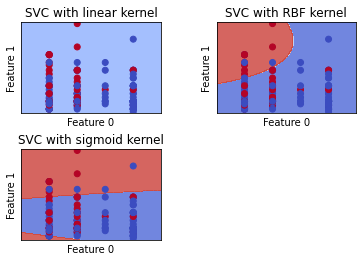

In [170]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with sigmoid kernel']

for i, clf in enumerate((svc_linear, svc_rbf, svc_sig)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the test points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

From the above plots, it can be observed that the **rbf kernel** does a better job than the sigmoid and linear kernels in classifying the datapoints into their respective classes for features 0 and 1.

There doesn't appear to be any decision boundary for the linear SVM classifier (or it might be superimposed on the x-axis or y-axis, which might be the best linear decision boundary the SVM could find)

In [171]:
print("Test set accuracy using linear kernel =", accuracy_score(y_test, svc_linear.predict(X_test)))
print("Test set accuracy using rbf kernel =", accuracy_score(y_test, svc_rbf.predict(X_test)))
print("Test set accuracy using sigmoid kernel =", accuracy_score(y_test, svc_sig.predict(X_test)))

Test set accuracy using linear kernel = 0.7
Test set accuracy using rbf kernel = 0.74375
Test set accuracy using sigmoid kernel = 0.71875
